<a href="https://colab.research.google.com/github/VISHVAPRASATHVS/clustering/blob/main/mall_customers_clustering_using_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns

In [3]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
x = df.drop(['Age','CustomerID','Genre'],axis = 1)
x.head()

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [7]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.4,min_samples = 4,metric = 'euclidean')
model = db.fit(x_scaled)

In [8]:
label,count = unique_labels, counts = np.unique(model.labels_, return_counts=True)
print(label)
print(count)

[-1  0  1  2]
[ 14 126  33  27]


In [9]:
df['cluster'] = model.labels_
df.head(100)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
95,96,1,24,60,52,0
96,97,0,47,60,47,0
97,98,0,27,60,50,0
98,99,1,48,61,42,0


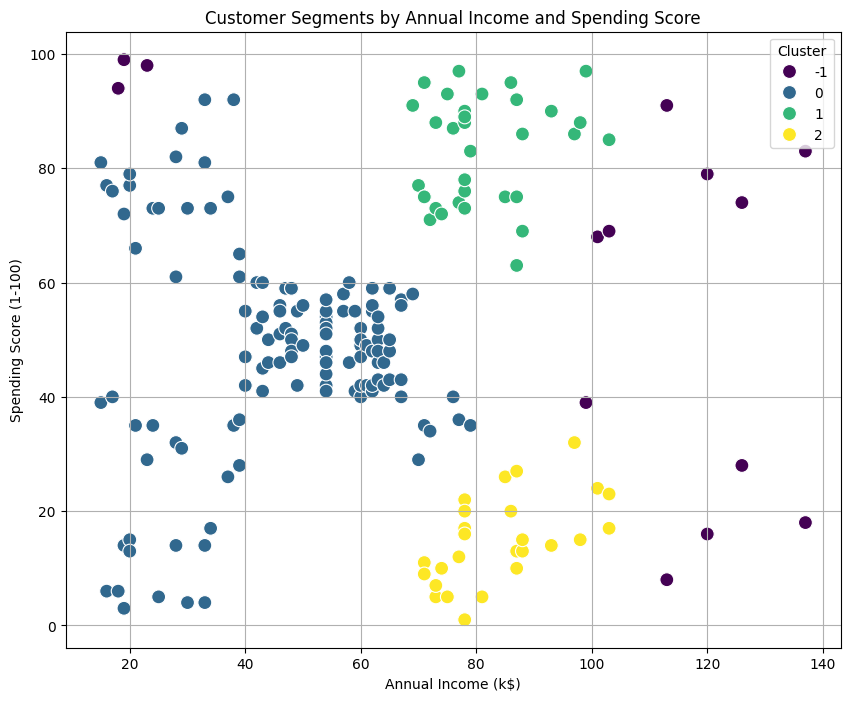

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments by Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()